In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
     

In [3]:
# load the dataset
#url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/economics.csv'
chirps = pd.read_csv('SPI-1.csv')
chirps

,system:time_start,SPI-1,1-month precip
0,"Jan 1, 1981",-0.784,199.159
1,"Feb 1, 1981",-1.655,183.061
2,"Mar 1, 1981",-0.517,282.767
3,"Apr 1, 1981",0.230,331.622
4,"May 1, 1981",-0.576,177.215
...,...,...,...
505,"Feb 1, 2023",0.888,335.221
506,"Mar 1, 2023",-0.455,285.944
507,"Apr 1, 2023",1.276,410.170
508,"May 1, 2023",-0.665,166.963


In [4]:
chirps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:time_start  510 non-null    object 
 1   SPI-1              510 non-null    float64
 2   1-month precip     510 non-null    float64
dtypes: float64(2), object(1)
memory usage: 12.1+ KB


In [5]:
chirps.set_index('system:time_start', inplace=True)

In [6]:
chirps.describe()

,SPI-1,1-month precip
count,510.000000,510.000000
mean,-0.004720,224.662967
std,0.979796,146.309352
min,-2.582000,11.616000
25%,-0.684750,83.756750
50%,-0.148000,235.919500
75%,0.569000,326.327000
max,3.755000,873.620000


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

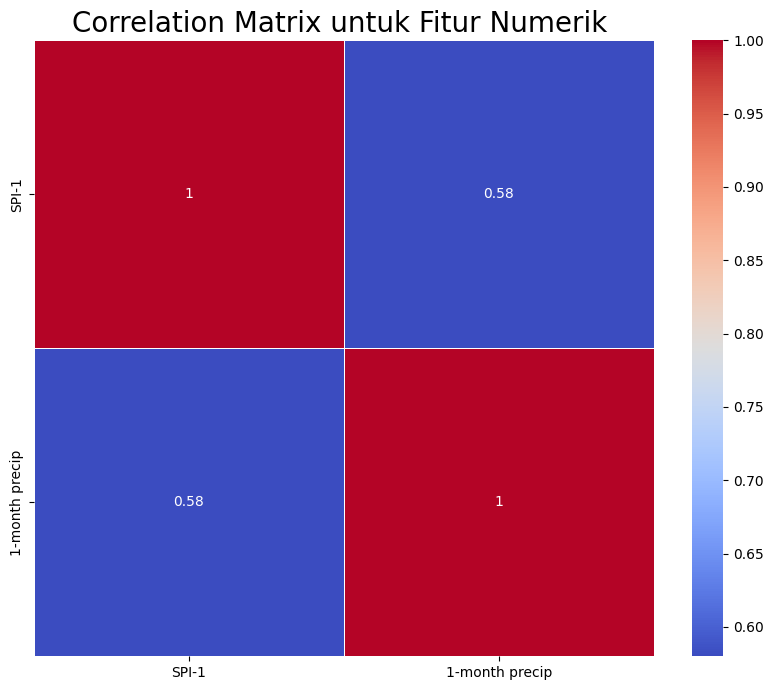

In [8]:

plt.figure(figsize=(10, 8))
correlation_matrix = chirps.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

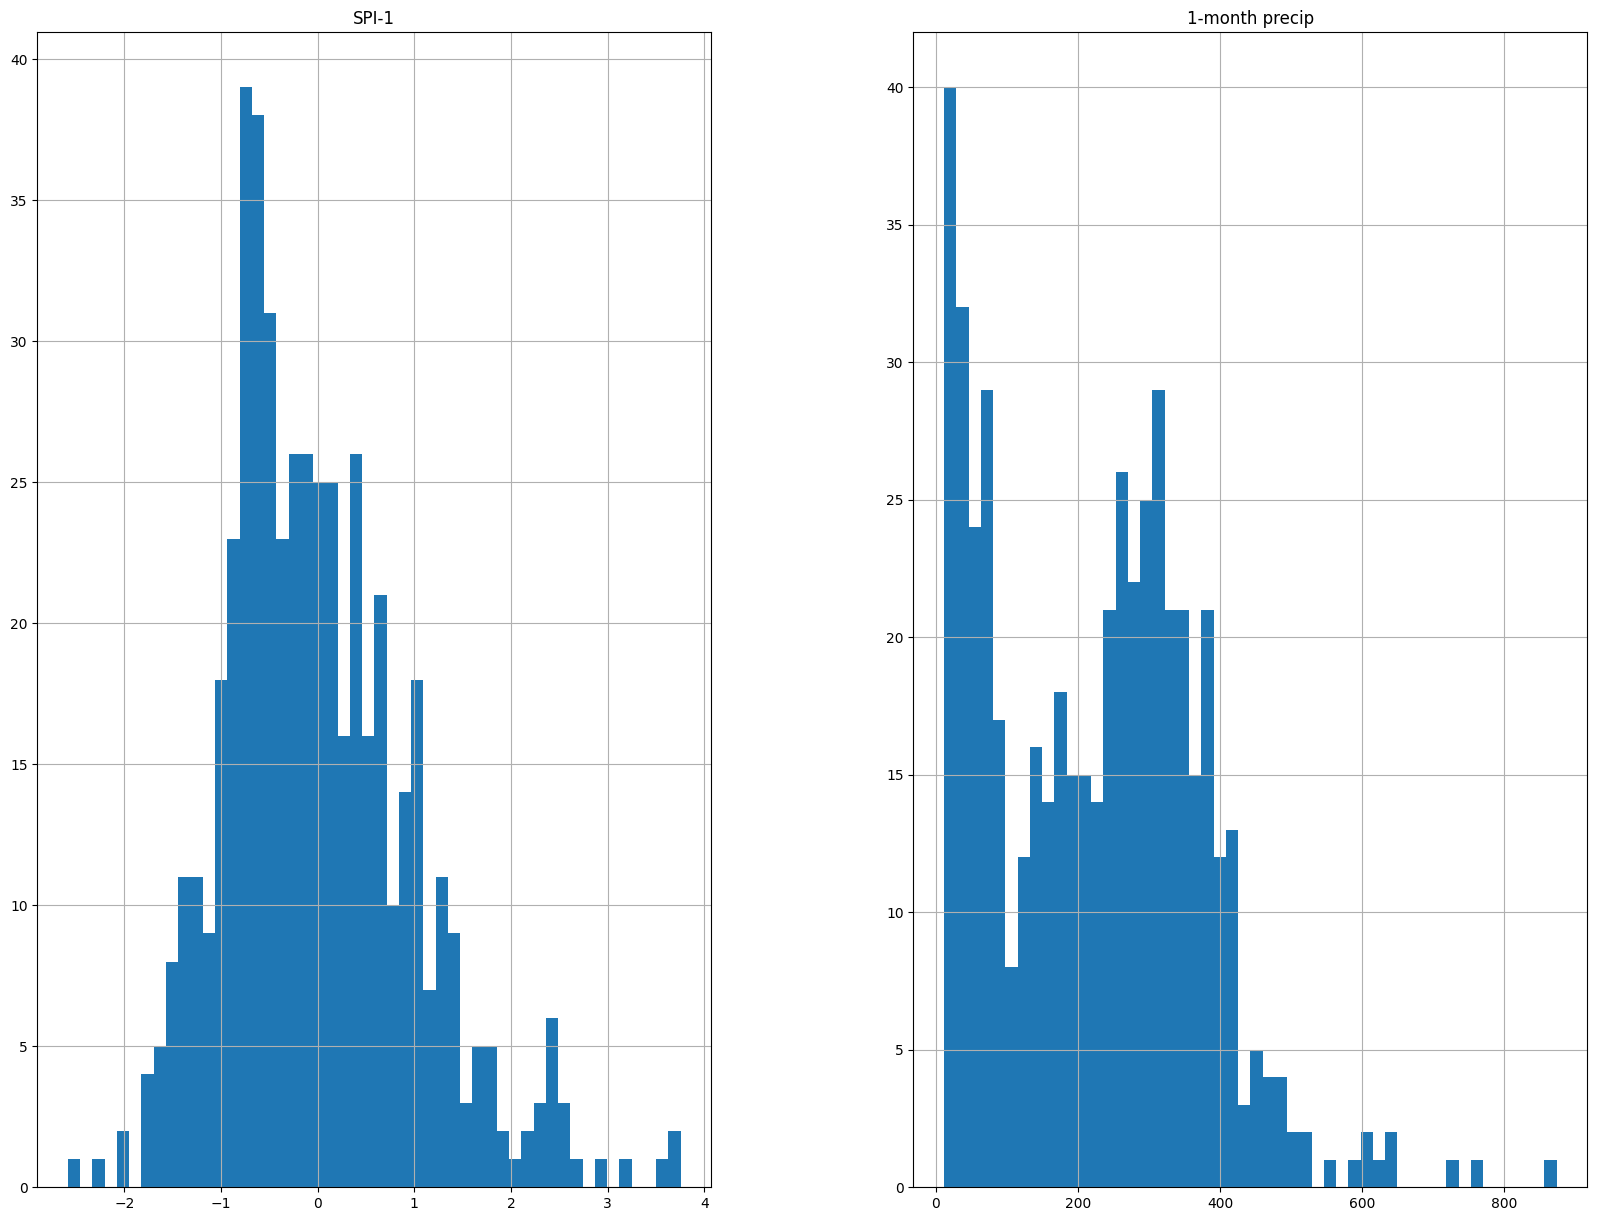

In [9]:
chirps.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:

from sklearn.model_selection import train_test_split
 
X = chirps.drop(["SPI-1"],axis =1)
y = chirps["SPI-1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [11]:

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')


Total # of sample in whole dataset: 510
Total # of sample in train dataset: 459
Total # of sample in test dataset: 51


In [12]:

from sklearn.preprocessing import StandardScaler
 
numerical_features = ['1-month precip']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,1-month precip
system:time_start,
"Jan 1, 2005",0.077234
"Apr 1, 1982",0.621198
"Feb 1, 2013",0.071325
"Jan 1, 1983",-0.232132
"Dec 1, 1995",0.520242


In [13]:
X_train[numerical_features].describe().round(4)

,1-month precip
count,459.0000
mean,0.0000
std,1.0011
min,-1.4384
25%,-0.9794
50%,0.0772
75%,0.7206
max,4.3830


In [14]:

models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [15]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [68]:

# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=55, max_depth=4, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)  

In [17]:

from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [18]:


X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [69]:


mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 

mse

,train,test
KNN,0.000468,0.000767
RF,0.000461,0.000708
Boosting,0.00051,0.000751


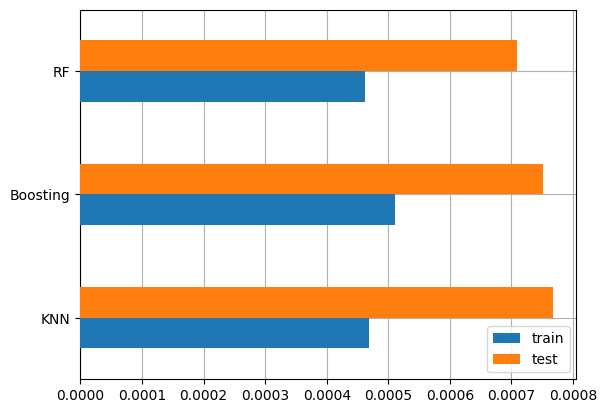

In [70]:

fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)


In [75]:

prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(2)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
system:time_start,,,,
"Nov 1, 1983",-0.234,0.79,0.58,0.66
"Mar 1, 1996",-1.637,0.12,-0.28,0.03
"Feb 1, 1988",-0.895,-0.58,-0.32,-0.20
"Oct 1, 2003",0.594,-0.28,-0.17,-0.18
"Jan 1, 1984",0.475,-0.08,-0.19,-0.18
"Jun 1, 1981",0.032,0.11,-0.07,-0.05
"Sep 1, 2004",-0.292,0.19,-0.07,-0.05
"Jan 1, 2003",-1.444,-0.58,-0.20,-0.15
"Dec 1, 2019",0.385,1.27,1.19,1.04
